### Importing Libraries

In [1]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [3]:
Dataset = pd.read_csv("cars_price.csv")

In [4]:
Dataset.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [5]:
Dataset = Dataset.drop(['Unnamed: 0'], axis=1)

In [6]:
Dataset.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [8]:
Dataset.shape

(40000, 12)

In [11]:
# Dropping entries with empty values
Dataset = Dataset.dropna()

In [12]:
Dataset.shape

(35016, 12)

### Statistical Information

In [19]:
Dataset.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,35016.000000,35016.000000,3.501600e+04,35016.000000
mean,7336.923435,2003.470528,2.468547e+05,2091.419580
std,7858.066435,7.899316,3.095286e+05,922.082696
min,100.000000,1957.000000,0.000000e+00,500.000000
25%,2400.000000,1998.000000,1.420000e+05,1600.000000
50%,5400.000000,2004.000000,2.320000e+05,1984.000000
75%,9799.000000,2010.000000,3.125460e+05,2300.000000
max,170000.000000,2019.000000,9.999999e+06,20000.000000


In [16]:
Dataset.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [17]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35016 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 35016 non-null  object 
 1   model                35016 non-null  object 
 2   priceUSD             35016 non-null  int64  
 3   year                 35016 non-null  int64  
 4   condition            35016 non-null  object 
 5   mileage(kilometers)  35016 non-null  float64
 6   fuel_type            35016 non-null  object 
 7   volume(cm3)          35016 non-null  float64
 8   color                35016 non-null  object 
 9   transmission         35016 non-null  object 
 10  drive_unit           35016 non-null  object 
 11  segment              35016 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.5+ MB


In [18]:
Dataset.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment'],
      dtype='object')

### Data Visualisation

In [21]:
Dataset["priceUSD"].describe()

count     35016.000000
mean       7336.923435
std        7858.066435
min         100.000000
25%        2400.000000
50%        5400.000000
75%        9799.000000
max      170000.000000
Name: priceUSD, dtype: float64

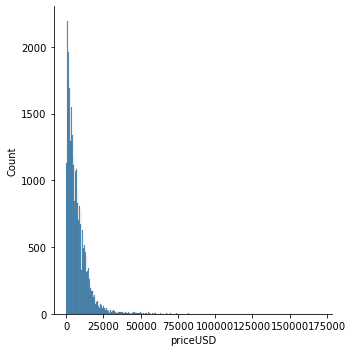

In [45]:
sns.displot(Dataset['priceUSD'])

/home/mechanic/anaconda3/envs/Work/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


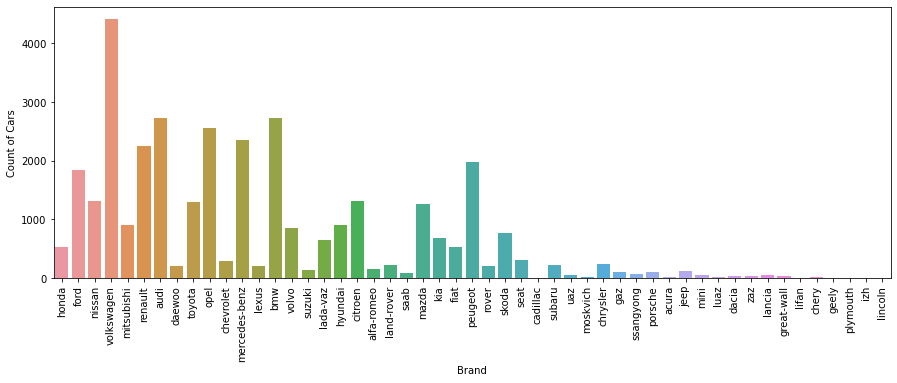

<Figure size 432x288 with 0 Axes>

In [64]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(Dataset['make'])
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation='vertical')
plt.show()
plt.tight_layout()

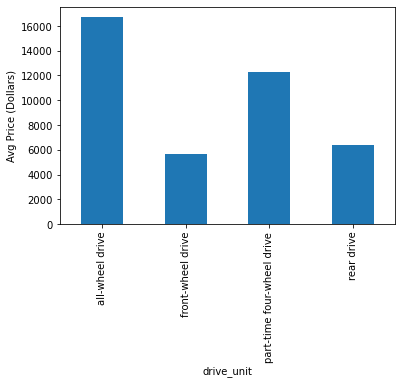

In [70]:
plt1 = Dataset[['drive_unit','priceUSD']].groupby("drive_unit").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("drive_unit")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

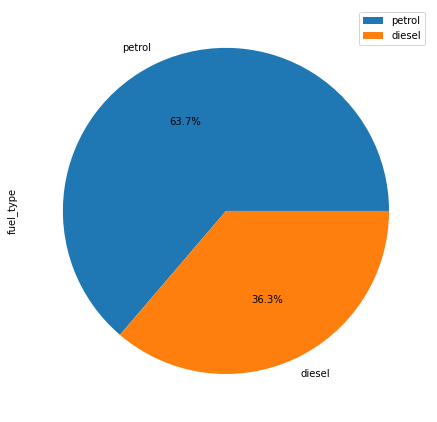

<Figure size 432x288 with 0 Axes>

In [72]:
df_sym = pd.DataFrame(Dataset['fuel_type'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

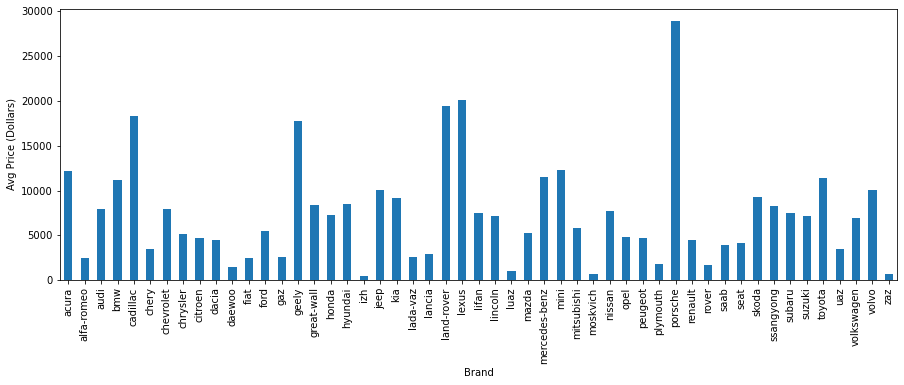

In [90]:
avg_price = Dataset[['make','priceUSD']].groupby("make", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = avg_price.plot(x = 'make', kind='bar',legend = False, sort_columns = True, figsize = (15,5))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

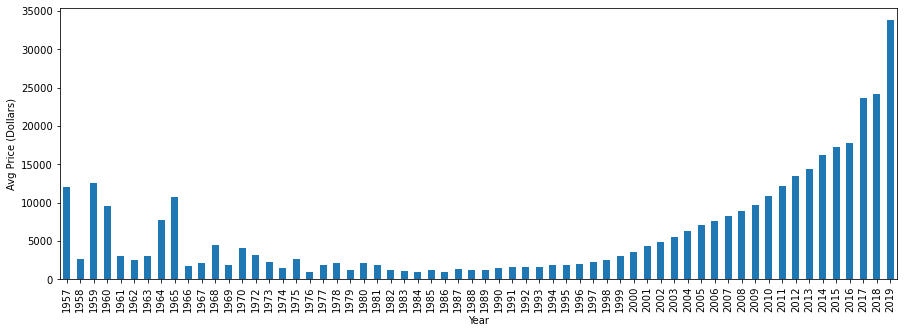

In [91]:
avg_price_vs_year = Dataset[['year','priceUSD']].groupby("year", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = avg_price_vs_year.plot(x = 'year', kind='bar',legend = False, sort_columns = True, figsize = (15,5))
plt1.set_xlabel("Year")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

/home/mechanic/anaconda3/envs/Work/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


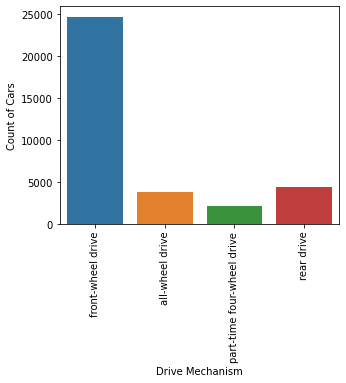

<Figure size 432x288 with 0 Axes>

In [102]:
fig, ax = plt.subplots(figsize = (5,4))
plt1 = sns.countplot(Dataset['drive_unit'])
plt1.set(xlabel = 'Drive Mechanism', ylabel= 'Count of Cars')
plt.xticks(rotation='vertical')
plt.show()
plt.tight_layout()

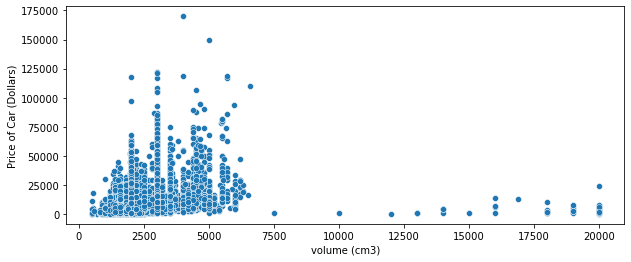

In [96]:
fig, ax = plt.subplots(figsize = (10,4))
plt1 = sns.scatterplot(x = 'volume(cm3)', y = 'priceUSD', data = Dataset)
plt1.set_xlabel('volume (cm3)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

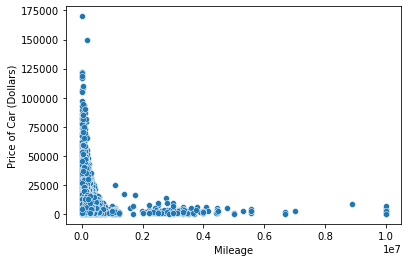

In [97]:
plt1 = sns.scatterplot(x = 'mileage(kilometers)', y = 'priceUSD', data = Dataset)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

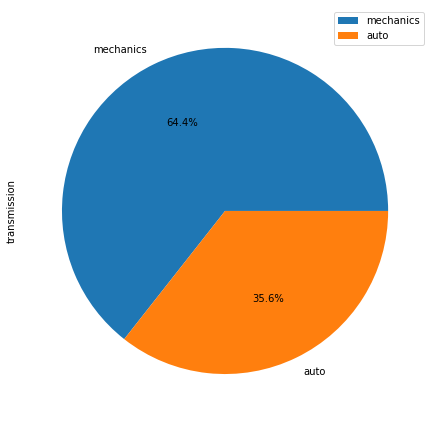

<Figure size 432x288 with 0 Axes>

In [98]:
df_sym = pd.DataFrame(Dataset['transmission'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

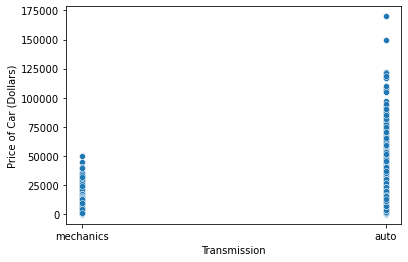

In [99]:
plt1 = sns.scatterplot(x = 'transmission', y = 'priceUSD', data = Dataset)
plt1.set_xlabel('Transmission')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

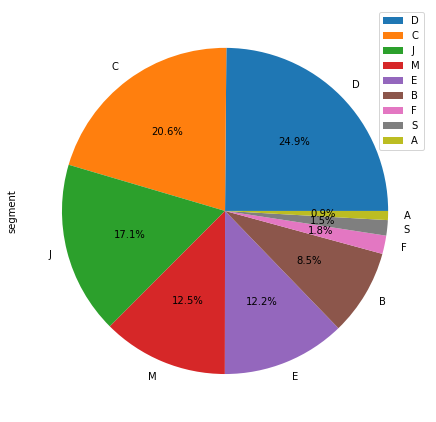

<Figure size 432x288 with 0 Axes>

In [100]:
df_sym = pd.DataFrame(Dataset['segment'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

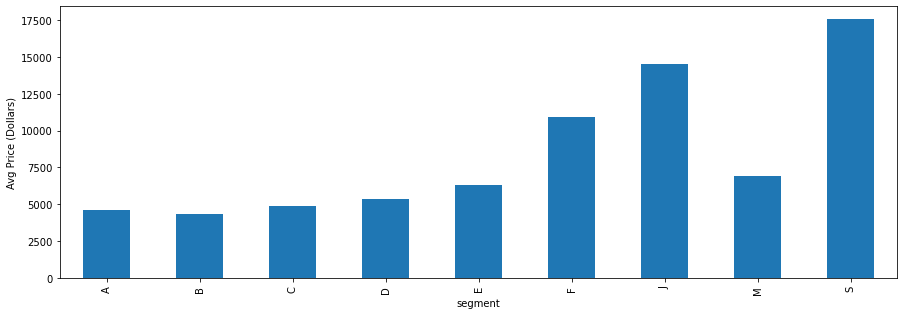

In [106]:
avg_price_vs_segment = Dataset[['segment','priceUSD']].groupby("segment", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = avg_price_vs_segment.plot(x = 'segment', kind='bar',legend = False, sort_columns = True, figsize = (15,5))
plt1.set_xlabel("segment")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [111]:
# Pair plot for numerical values

<Figure size 1224x1080 with 0 Axes>

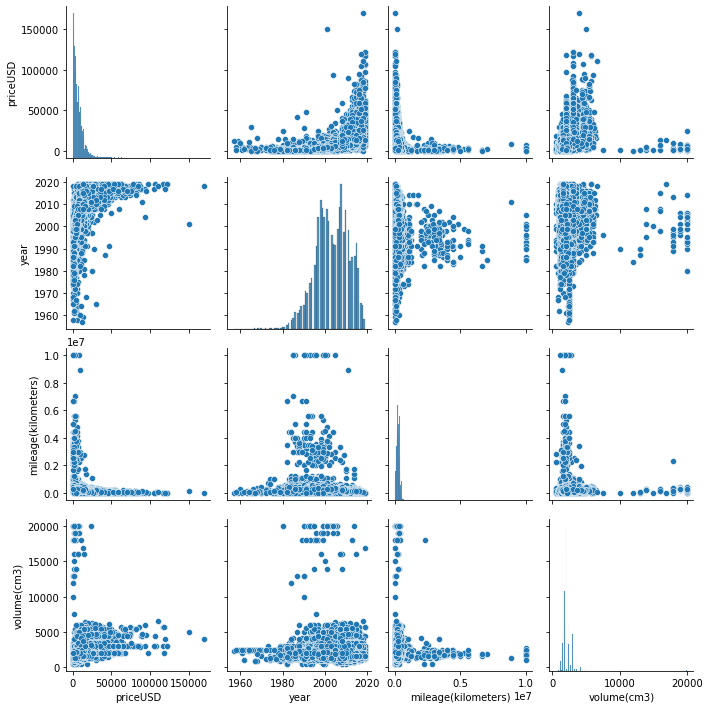

In [110]:
plt.figure(figsize=(17, 15))
sns.pairplot(Dataset)
plt.show()

In [112]:
# Box plot for categorical values

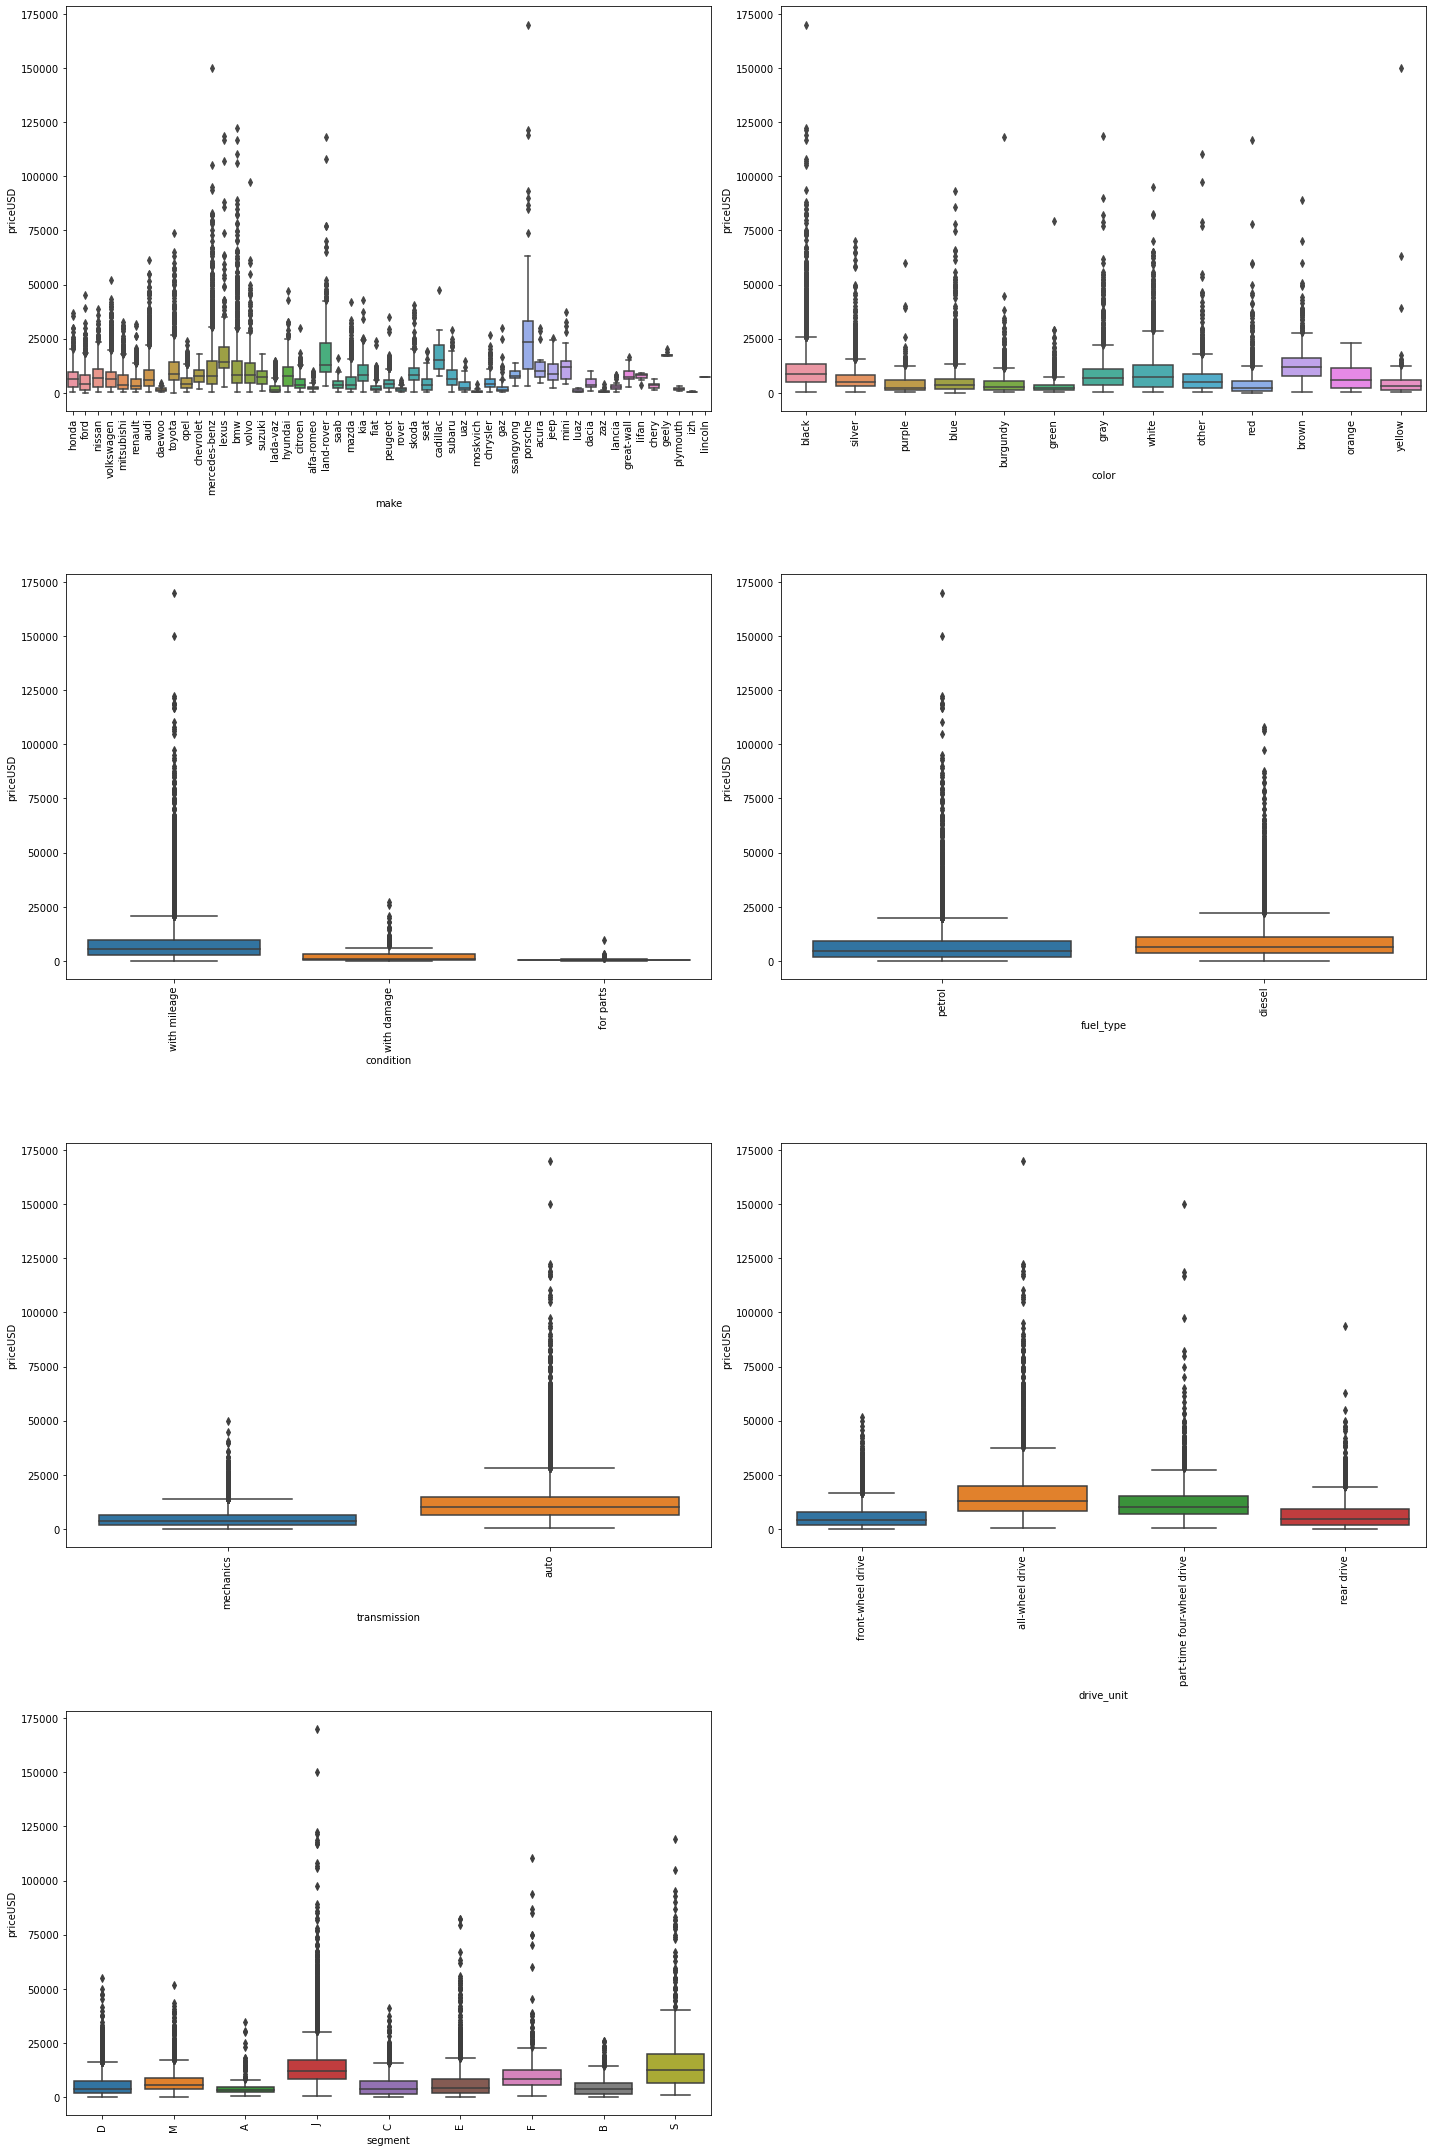

In [128]:
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'make', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.subplot(4,2,2)
sns.boxplot(x = 'color', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.subplot(4,2,3)
sns.boxplot(x = 'condition', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.subplot(4,2,4)
sns.boxplot(x = 'fuel_type', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.subplot(4,2,5)
sns.boxplot(x = 'transmission', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.subplot(4,2,6)
sns.boxplot(x = 'drive_unit', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.subplot(4,2,7)
sns.boxplot(x = 'segment', y = 'priceUSD', data = Dataset)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()